___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

In this project, we will deal with a hypothetical Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Let's get started!


## Imports
**We'll Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style = 'darkgrid', context = 'talk')
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**We'll read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('/Users/archismanchakraborti/Desktop/python files/Jupyter_notebooks/Data science/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce Customers')

**We'll check the head of customers, and check out its info() and describe() methods.**

In [3]:
# head
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# description
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**We'll use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

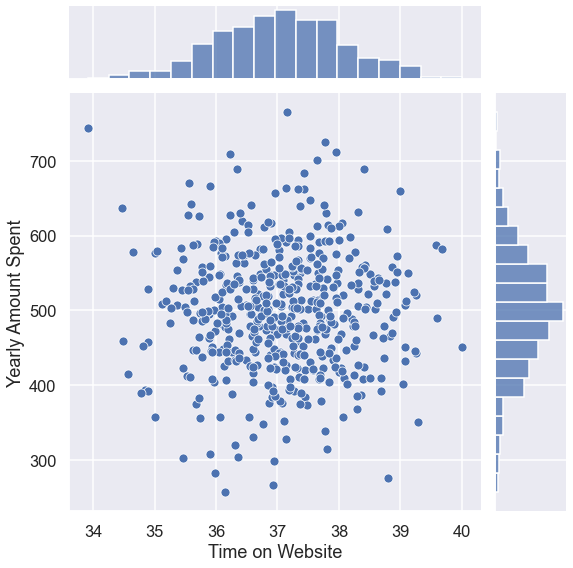

In [6]:
sns.jointplot(x = customers['Time on Website'], y = customers['Yearly Amount Spent'], kind = 'scatter', height = 8)

**We don't see a significant amount of correlation in this data but we do se the normal distribution of both the variables**

**We'll do the same but with the Time on App column instead.**

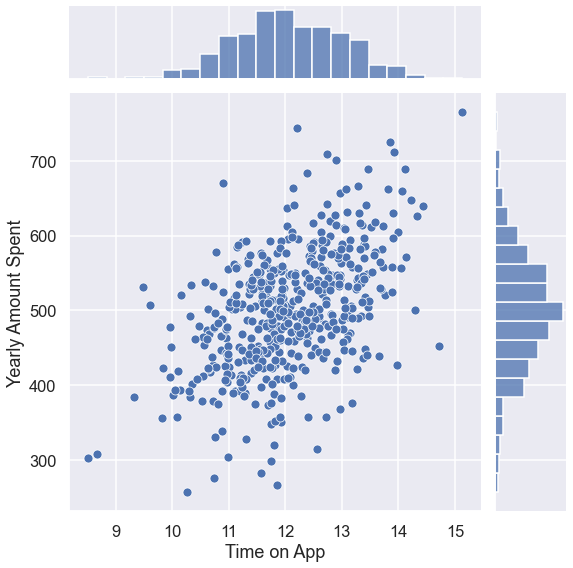

In [7]:
sns.jointplot(x = customers['Time on App'], y = customers['Yearly Amount Spent'], kind = 'scatter', height = 8)

#### There seems to be some kind of linear correlation in this case

**We'll use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

In [8]:
# column names for quick reference
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

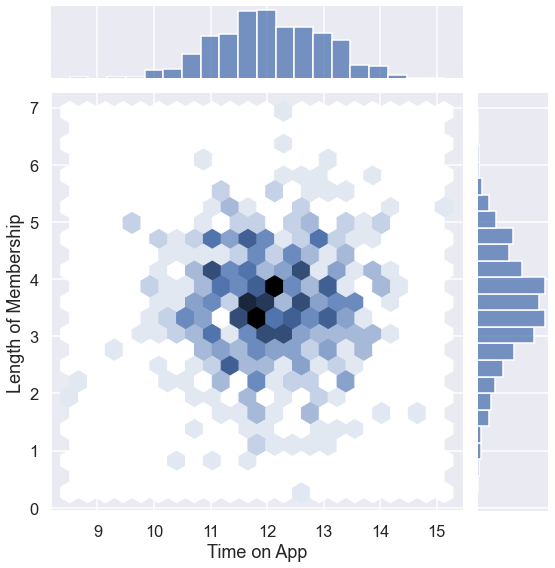

In [9]:
sns.jointplot(x = customers['Time on App'], y = customers['Length of Membership'], kind = 'hex', height = 8)

**Let's explore these types of relationships across the entire data set. We'll use pairplot.**

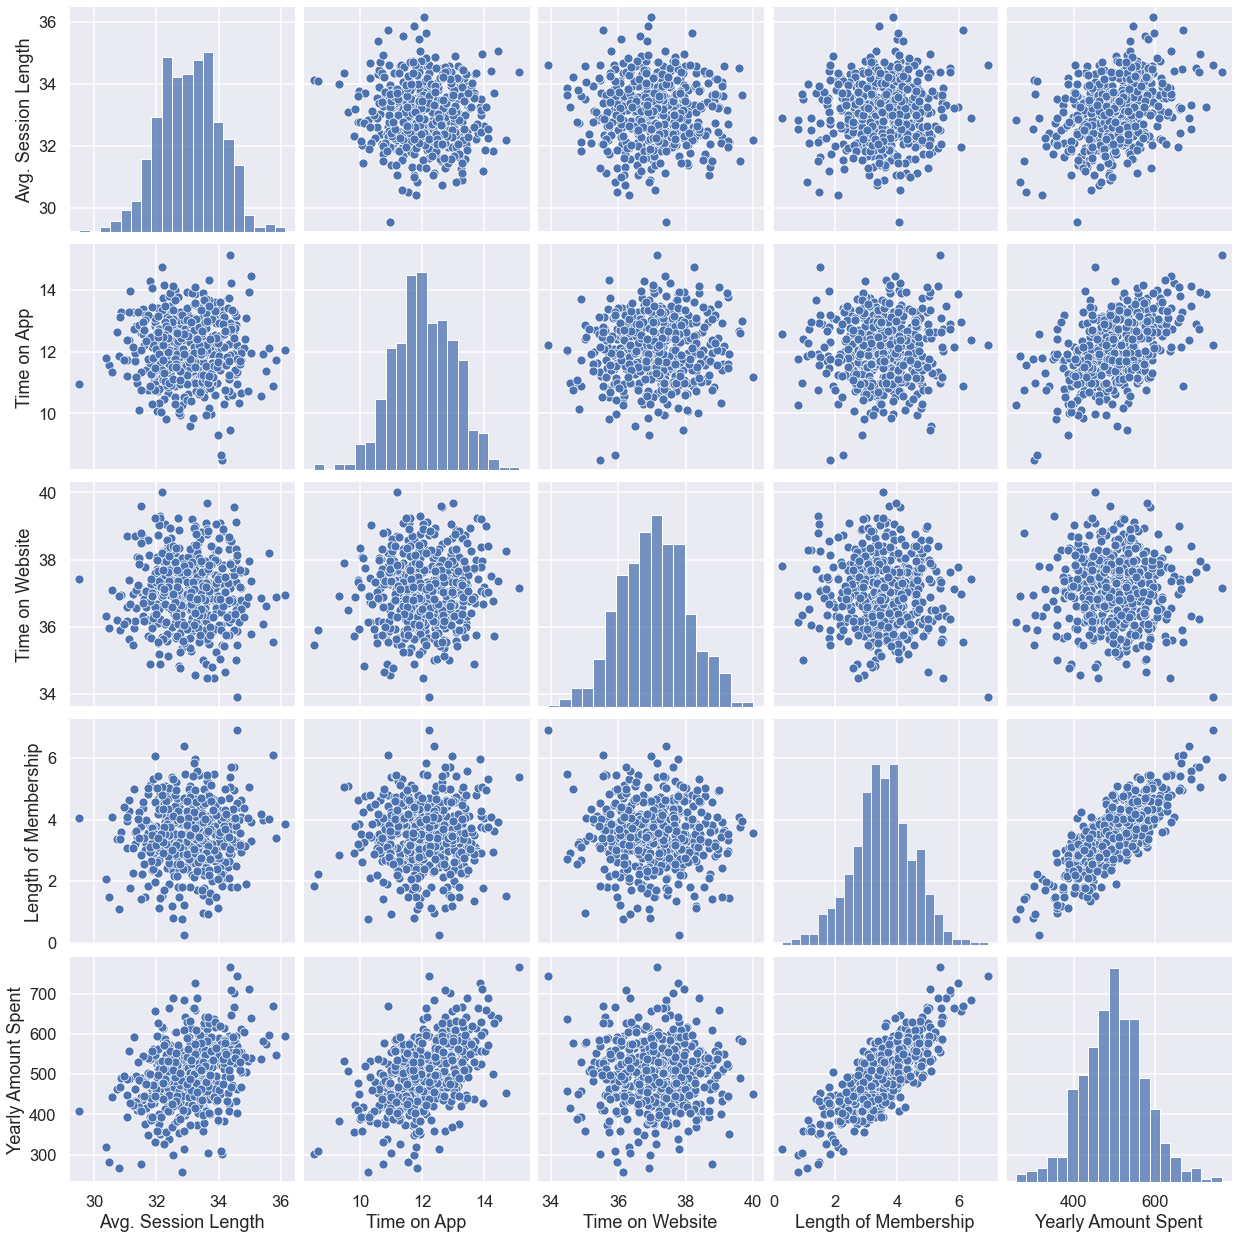

In [10]:
sns.pairplot(customers, height = 3.5)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Yearly amount spent vs Length of Membership

#### We will confirm our idea with a heat map of the data

<AxesSubplot:>

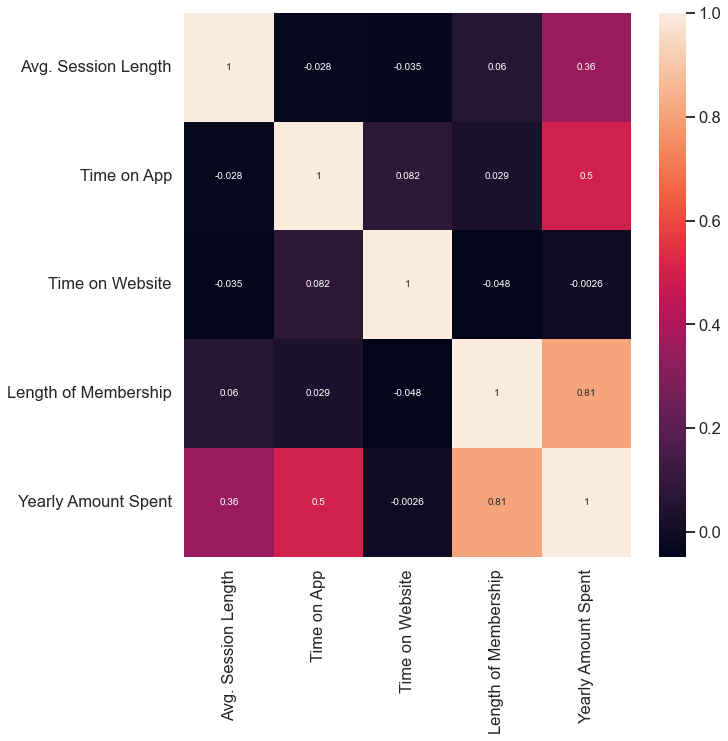

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(data = customers.corr(), annot=True)

We see that the correlation between length of membership and yearly amount spent is indeed the maximum.

**We'll create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

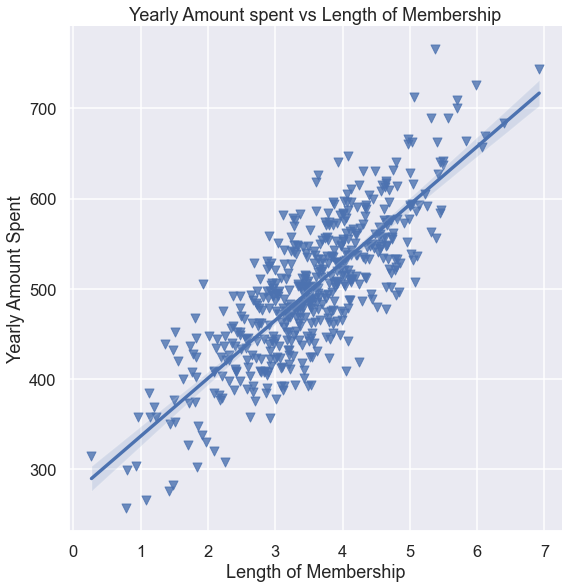

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,
      height = 8, markers = 'v')
plt.title('Yearly Amount spent vs Length of Membership');

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**We'll set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [13]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
# Features
X = customers.iloc[:, 3:-1]

#labels
y = customers.iloc[:, -1]

**We'll Use model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Model

Now its time to train our model on our training data!

**We'll import LinearRegression from sklearn.linear_model**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#instance of the model
regressor = LinearRegression()

**We'll train/fit regressor on the training data.**

In [19]:
regressor.fit(X_train, y_train)

LinearRegression()

**We'll check out the coefficients of the model**

In [20]:
regressor.coef_

array([25.69988841, 38.94917574,  0.899136  , 61.4205894 ])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [21]:
predictions = regressor.predict(X_test)

**We'll Create a scatterplot of the real test values versus the predicted values.**

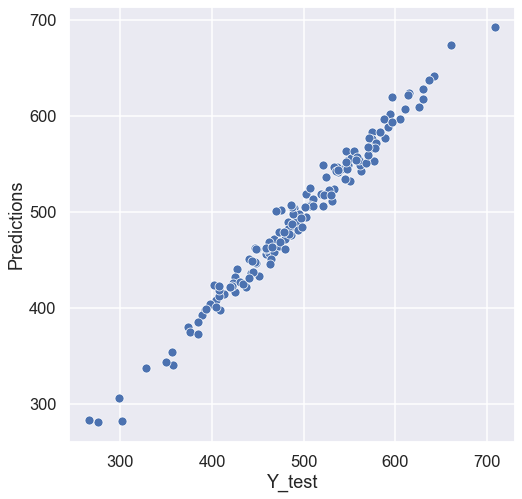

In [22]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = y_test,y = predictions, alpha = 1)
plt.xlabel( 'Y_test');
plt.ylabel('Predictions');

It's almost a straight line with same ranges implying that the fit was good

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**We'll Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Mean absolute error
print(f'MAE: {mean_absolute_error(y_test, predictions)}')

# Mean squared error
print(f'MSE: {mean_squared_error(y_test, predictions)}')

# Root mean Squared error
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

MAE: 8.397296309906448
MSE: 111.89979111116115
RMSE: 10.57826975980293


In [24]:
explained_variance_score(y_test, predictions)

0.9821553309417276

## Residuals

We have got a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**We'll Plot a histogram of the residuals and make sure it looks normally distributed.**

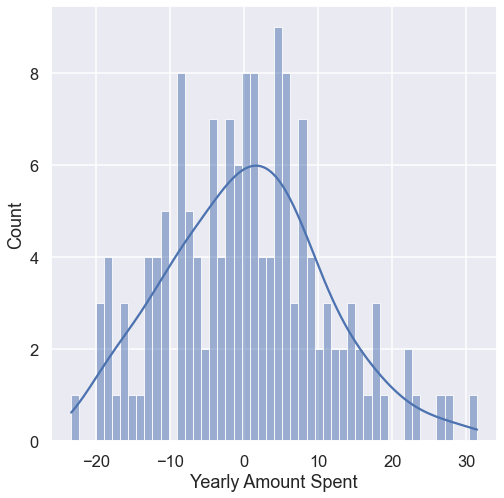

In [25]:
plt.figure(figsize = (8,8))
res = (predictions - y_test)
sns.histplot(res, bins = 50, kde = True);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.



In [26]:
pd.DataFrame(data = regressor.coef_ , index = customers.columns[3:-1], columns = ['Coefficients'])

,Coefficients
Avg. Session Length,25.699888
Time on App,38.949176
Time on Website,0.899136
Length of Membership,61.420589


**How can we interpret these coefficients?**

*A unit increase in one of the indexes holding other indexes constant give an amount of increase in the Yearly Amount spent as in the coefficients.
For Example, a. unit change in Avg. Session Length gives a change of 25.981550 units in the Yearly Amount Spent.*

**Should the company focus more on their mobile app or on their website?**

*The coefficient for time on app is quite high implying that a unit increase in time on the app gives a substantial increase(= 38.590159) units of yearly amount spent by the customer. So, the company should focus more on their website.*

---
# END
---